In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(color_codes=True)

In [2]:
population_per_country = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/PopulationPerCountry.csv', skiprows = range(0,4))
population_per_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [3]:
GDP_Country = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/GDP_by_Country.csv', skiprows = range(0,4))
GDP_Country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [4]:
GDP_Data = pd.merge(GDP_Country, population_per_country, on= ['Country Code','Country Name'], how='inner')
GDP_Data.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,Unnamed: 62_y
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [5]:
GDP_Data = GDP_Data.drop(['Indicator Name_x','Indicator Code_x','Indicator Name_y','Indicator Code_y','Unnamed: 62_y','Unnamed: 62_x'], axis = 1)
GDP_Data.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [6]:

GDP_Data1 = pd.DataFrame()
for col in GDP_Data.columns:
    if col.endswith("Name"):
        country = col[:]
        GDP_Data1[country] = GDP_Data[country]
    if col.endswith("_x"):
        year = col[:4]
        GDP_Data1[year] = GDP_Data[year + '_x']/GDP_Data[year + '_y']
    if col.endswith("Code"):
        code = col[:]
        GDP_Data1[code] = GDP_Data[code]
        
GDP_Data1.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN


In [7]:
GDP_Combine = pd.melt(GDP_Data1,id_vars=['Country Name','Country Code'])
GDP_Combine.head()

,Country Name,Country Code,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [8]:
Women_Informed_Choices = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/WomenMakingInformedChoicestoReproductiveHealthCare.csv', skiprows = range(0,4))
Women_Informed_Choices.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Women_Informed_Choices = pd.melt(Women_Informed_Choices,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Women_Informed_Choices.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN


In [10]:
RuralPopulation_PerCent = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/RuralPopulationofTotalPopulation.csv', skiprows = range(0,4))
RuralPopulation_PerCent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,NaN,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,NaN,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,NaN,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,NaN,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,NaN,NaN


In [11]:
RuralPopulation_PerCent = RuralPopulation_PerCent.drop(['Unnamed: 62'],axis = 1)
RuralPopulation_PerCent = pd.melt(RuralPopulation_PerCent,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
RuralPopulation_PerCent.head()


,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [12]:
PublicEducation_Expenditure = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/public-education-expenditure-as-share-of-gdp.csv')
PublicEducation_Expenditure.head()

,Entity,Code,Year,Public Expenditure on Education (percent of GDP)
0,Australia,AUS,1937,0.7
1,Australia,AUS,1960,1.4
2,Australia,AUS,1980,5.5
3,Australia,AUS,1993,6.0
4,Austria,AUT,1937,2.5


In [13]:
LegalRights_Strength = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/LegalRightsStrengthIndex.csv', skiprows = range(0,4))
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,6.0,6.0,6.0,8.0
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
LegalRights_Strength  = pd.melt(LegalRights_Strength ,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN


In [15]:
CreditTo_PrivateSector = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/DomesticCreditToPrivateSector.csv', skiprows = range(0,4))
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,57.120089,58.464522,57.412579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,9.272727,8.753036,7.154471,5.068047,5.186111,4.971303,...,10.525779,11.516851,4.924573,4.335081,4.343259,4.028907,3.964638,3.598476,NaN,NaN
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.468893,20.215879,20.179426,22.262184,23.387915,22.885054,27.224227,21.131451,NaN,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.917800,37.508391,39.460898,39.060291,38.008684,37.529530,35.640105,34.719529,NaN,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
CreditTo_PrivateSector = CreditTo_PrivateSector.drop(['Unnamed: 62'],axis = 1)
CreditTo_PrivateSector = pd.melt(CreditTo_PrivateSector,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,9.272727
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN


In [17]:
BirthsAttendedby_SkilledStaff = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/BirthsAttendedbySkilledHealthStaffofTotal.csv', skiprows = range(0,4))
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,34.3,38.6,39.9,NaN,45.2,50.5,NaN,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
BirthsAttendedby_SkilledStaff = pd.melt(BirthsAttendedby_SkilledStaff,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN


In [19]:
ATMMachines_Ratio = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/ATMMachines_Per100000Adults.csv', skiprows = range(0,4))
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.976843,119.579276,124.175678,117.944197,119.067267,126.019533,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302450,0.452439,0.532064,0.620063,0.642222,0.712434,0.758811,0.929837,1.074215,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.258697,8.379175,10.467709,12.778432,15.244404,17.036173,18.218209,18.829198,NaN,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,28.626528,32.941436,34.136791,35.264534,35.679200,35.306905,34.553125,34.979216,33.806812,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ATMMachines_Ratio = pd.melt(ATMMachines_Ratio,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN


In [21]:
Agricultural_Machines = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/AgriculturalMachinery_PerUnitofArableLand.csv', skiprows = range(0,4))
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,0.156863,0.194805,0.258065,0.256410,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,2.996255,6.092593,7.352941,10.243636,10.830325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,67.129630,87.155963,86.363636,94.808126,94.152174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1534.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Agricultural_Machines = Agricultural_Machines.drop(['Unnamed: 62'],axis = 1)
Agricultural_Machines = pd.melt(Agricultural_Machines,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN


In [23]:
LiteracyRate_Adult = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/AdultPopulation_Literate.csv', skiprows = range(0,4))
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.94053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,45.41710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.97415,NaN,NaN,NaN,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.00816,98.35261,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN


In [24]:
LiteracyRate_Adult = pd.melt(LiteracyRate_Adult,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN


In [25]:
AccountsRatio_FinancialInst = pd.read_csv('/Users/priyanshiagarwal/Downloads/Predicting-World-GDP-using-Economical-Social-Parameters-master/Data Sources/AccountAtaFinancialInstitutionMale15Adults.csv', skiprows = range(0,4))
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.41546,NaN,NaN,15.78467,NaN,NaN,NaN,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.48097,NaN,NaN,36.13213,NaN,NaN,NaN,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.66468,NaN,NaN,42.51969,NaN,NaN,NaN,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
AccountsRatio_FinancialInst= AccountsRatio_FinancialInst.drop(['Unnamed: 62'],axis = 1)
AccountsRatio_FinancialInst = pd.melt(AccountsRatio_FinancialInst,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN


In [27]:
GDP_Combine['Women_Informed_Choices'] = Women_Informed_Choices.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices
0,Aruba,ABW,1960,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN
2,Angola,AGO,1960,NaN,NaN
3,Albania,ALB,1960,NaN,NaN
4,Andorra,AND,1960,NaN,NaN


In [28]:
GDP_Combine['RuralPopulation_PerCent'] = RuralPopulation_PerCent.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent
0,Aruba,ABW,1960,NaN,NaN,49.224
1,Afghanistan,AFG,1960,59.777327,NaN,91.779
2,Angola,AGO,1960,NaN,NaN,89.565
3,Albania,ALB,1960,NaN,NaN,69.295
4,Andorra,AND,1960,NaN,NaN,41.550


In [29]:
GDP_Combine['LegalRights_Strength'] = LegalRights_Strength.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN


In [30]:
GDP_Combine['CreditTo_PrivateSector'] = CreditTo_PrivateSector.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN


In [31]:
GDP_Combine['BirthsAttendedby_SkilledStaff'] = BirthsAttendedby_SkilledStaff.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN


In [32]:
GDP_Combine['ATMMachines_Ratio'] = ATMMachines_Ratio.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN


In [33]:
GDP_Combine['Agricultural_Machines'] = Agricultural_Machines.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN


In [34]:
GDP_Combine['LiteracyRate_Adult'] = LiteracyRate_Adult.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
GDP_Combine['AccountsRatio_FinancialInst'] = AccountsRatio_FinancialInst.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
GDP_Combine.describe()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
count,11504.000000,45.000000,14812.000000,1173.000000,9413.000000,2374.000000,2675.000000,7495.000000,914.000000,312.000000
mean,7064.897460,46.753333,50.967392,5.048928,43.704950,87.478072,40.118002,259.018009,82.310860,52.478870
std,14165.592045,20.997842,24.946722,2.793285,210.734304,21.527805,43.232175,521.680212,17.405254,30.882468
min,34.741428,3.400000,0.000000,0.000000,0.000823,5.000000,0.000000,0.004348,13.512920,0.000000
25%,465.108857,30.700000,31.500250,3.000000,14.281245,87.400000,7.182815,15.073149,74.374773,23.409882
50%,1615.398664,49.000000,52.926000,5.000000,26.368597,98.600000,28.553692,74.867880,87.930425,49.678320
75%,6399.421277,61.500000,71.375000,6.904762,50.115827,99.700000,56.215227,237.781343,95.672157,82.099187
max,192989.189527,81.000000,97.923000,12.000000,13956.763169,100.000000,288.631913,6600.462428,100.000000,100.000000


In [38]:
#Cleaning of the data and filling the null values
print(GDP_Combine.isnull().any())

Country Name                     False
Country Code                     False
variable                         False
value                             True
Women_Informed_Choices            True
RuralPopulation_PerCent           True
LegalRights_Strength              True
CreditTo_PrivateSector            True
BirthsAttendedby_SkilledStaff     True
ATMMachines_Ratio                 True
Agricultural_Machines             True
LiteracyRate_Adult                True
AccountsRatio_FinancialInst       True
dtype: bool


In [39]:
#this part of the code counts the missing values and fills it with the mean values
print(GDP_Combine['value'].isnull().sum())
GDP_Combine.dropna(subset=['value'],inplace = True)
print(GDP_Combine['value'].notnull().sum())

3808
11504


In [40]:
print(GDP_Combine['Women_Informed_Choices'].isnull().sum())
GDP_Combine['Women_Informed_Choices'].fillna(value=GDP_Combine['Women_Informed_Choices'].mean(),inplace=True)
print(GDP_Combine['Women_Informed_Choices'].notnull().sum())

11459
11504


In [41]:
print(GDP_Combine['RuralPopulation_PerCent'].isnull().sum())
GDP_Combine['RuralPopulation_PerCent'].fillna(value=GDP_Combine['RuralPopulation_PerCent'].mean(),inplace=True)
print(GDP_Combine['RuralPopulation_PerCent'].notnull().sum())

17
11504


In [42]:
print(GDP_Combine['LegalRights_Strength'].isnull().sum())
GDP_Combine['LegalRights_Strength'].fillna(value=GDP_Combine['LegalRights_Strength'].mean(),inplace=True)
print(GDP_Combine['LegalRights_Strength'].notnull().sum())

10585
11504


In [43]:
print(GDP_Combine['CreditTo_PrivateSector'].isnull().sum())
GDP_Combine['CreditTo_PrivateSector'].fillna(value=GDP_Combine['CreditTo_PrivateSector'].mean(),inplace=True)
print(GDP_Combine['CreditTo_PrivateSector'].notnull().sum())

2416
11504


In [44]:
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].isnull().sum())
GDP_Combine['BirthsAttendedby_SkilledStaff'].fillna(value=GDP_Combine['BirthsAttendedby_SkilledStaff'].mean(),inplace=True)
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].notnull().sum())

9209
11504


In [45]:
print(GDP_Combine['ATMMachines_Ratio'].isnull().sum())
GDP_Combine['ATMMachines_Ratio'].fillna(value=GDP_Combine['ATMMachines_Ratio'].mean(),inplace=True)
print(GDP_Combine['ATMMachines_Ratio'].notnull().sum())

8844
11504


In [46]:
print(GDP_Combine['Agricultural_Machines'].isnull().sum())
GDP_Combine['Agricultural_Machines'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['Agricultural_Machines'].notnull().sum())

5331
11504


In [47]:
print(GDP_Combine['LiteracyRate_Adult'].isnull().sum())
GDP_Combine['LiteracyRate_Adult'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['LiteracyRate_Adult'].notnull().sum())

10622
11504


In [48]:

print(GDP_Combine['AccountsRatio_FinancialInst'].isnull().sum())
GDP_Combine['AccountsRatio_FinancialInst'].fillna(value=GDP_Combine['AccountsRatio_FinancialInst'].mean(),inplace=True)
print(GDP_Combine['AccountsRatio_FinancialInst'].notnull().sum())

11194
11504


In [49]:
GDP_Combine.describe()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
count,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000
mean,7064.897460,46.753333,50.444357,5.010290,44.704804,87.418299,40.080656,286.929970,271.215580,52.493345
std,14165.592045,1.298660,24.534467,0.758869,190.555395,9.560646,20.751874,402.688613,54.749847,5.068404
min,34.741428,3.400000,0.000000,0.000000,0.000823,5.000000,0.000000,0.004348,13.512920,0.000000
25%,465.108857,46.753333,30.302312,5.010290,17.313659,87.418299,40.080656,73.198112,286.929970,52.493345
50%,1615.398664,46.753333,52.362000,5.010290,37.234527,87.418299,40.080656,286.929970,286.929970,52.493345
75%,6399.421277,46.753333,70.775820,5.010290,44.704804,87.418299,40.080656,286.929970,286.929970,52.493345
max,192989.189527,81.000000,97.923000,12.000000,13956.763169,100.000000,288.631913,6600.462428,286.929970,100.000000


In [50]:

GDP_Combine.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
value,11504.000000,7064.897460,14165.592045,34.741428,465.108857,1615.398664,6399.421277,192989.189527
Women_Informed_Choices,11504.000000,46.753333,1.298660,3.400000,46.753333,46.753333,46.753333,81.000000
RuralPopulation_PerCent,11504.000000,50.444357,24.534467,0.000000,30.302312,52.362000,70.775820,97.923000
LegalRights_Strength,11504.000000,5.010290,0.758869,0.000000,5.010290,5.010290,5.010290,12.000000
CreditTo_PrivateSector,11504.000000,44.704804,190.555395,0.000823,17.313659,37.234527,44.704804,13956.763169
BirthsAttendedby_SkilledStaff,11504.000000,87.418299,9.560646,5.000000,87.418299,87.418299,87.418299,100.000000
ATMMachines_Ratio,11504.000000,40.080656,20.751874,0.000000,40.080656,40.080656,40.080656,288.631913
Agricultural_Machines,11504.000000,286.929970,402.688613,0.004348,73.198112,286.929970,286.929970,6600.462428
LiteracyRate_Adult,11504.000000,271.215580,54.749847,13.512920,286.929970,286.929970,286.929970,286.929970
AccountsRatio_FinancialInst,11504.000000,52.493345,5.068404,0.000000,52.493345,52.493345,52.493345,100.000000


<Figure size 1728x1728 with 0 Axes>

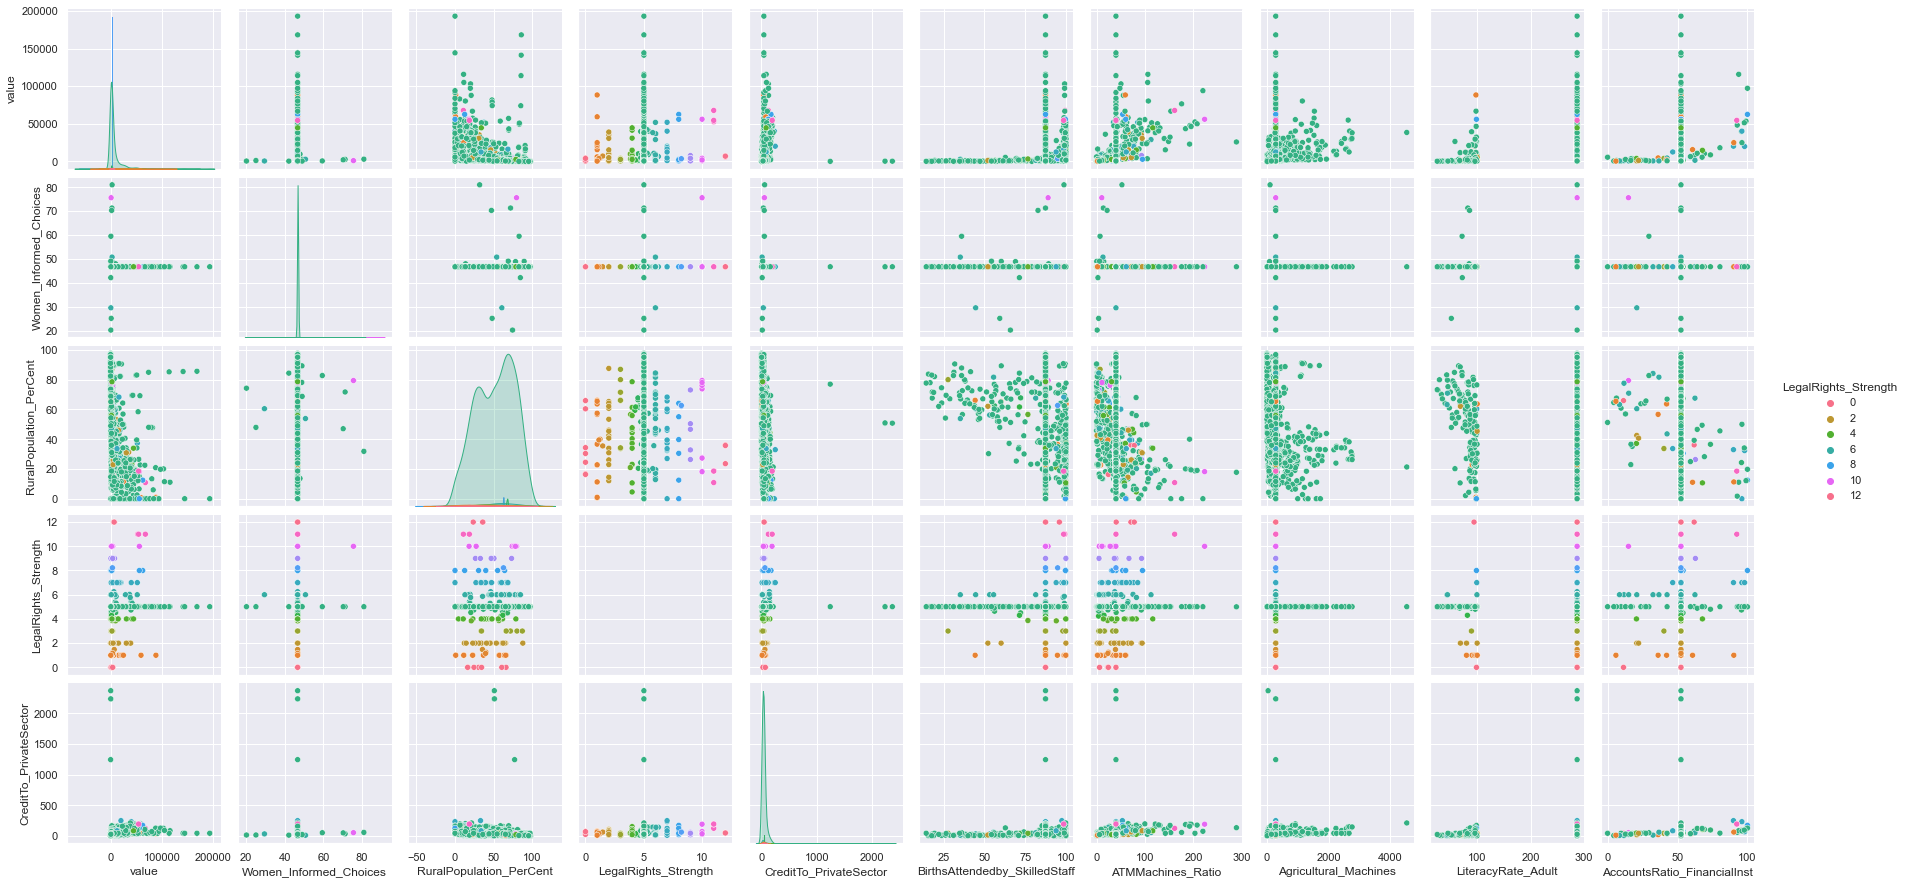

In [53]:
GDP_Combine_sample=GDP_Combine.sample(frac=.20)
plt.figure(figsize=(24,24))
x=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector',
   'BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
y1=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector']
y2=['BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
g=sns.pairplot(GDP_Combine_sample,hue="LegalRights_Strength",dropna=True,palette="husl",
              x_vars=x,y_vars=y1)
g.savefig("pairplot1.png")
plt.show()


In [56]:
#correlation matrix 
corr_matrix = GDP_Combine.corr()
corr_matrix

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1.000000,0.002671,-0.471648,3.015447e-02,0.075159,0.151493,0.395548,2.394128e-01,0.025777,1.640840e-01
Women_Informed_Choices,0.002671,1.000000,-0.009245,1.280947e-02,0.002803,0.074124,0.019854,-1.113558e-03,0.012303,3.033871e-02
RuralPopulation_PerCent,-0.471648,-0.009245,1.000000,1.323139e-02,-0.080411,-0.219623,-0.247643,-2.755799e-01,0.007544,-9.307780e-02
LegalRights_Strength,0.030154,0.012809,0.013231,1.000000e+00,0.008893,0.010660,0.066346,9.423532e-19,0.031791,4.018170e-02
CreditTo_PrivateSector,0.075159,0.002803,-0.080411,8.893449e-03,1.000000,0.031745,0.069056,3.980365e-02,0.005338,2.731477e-02
BirthsAttendedby_SkilledStaff,0.151493,0.074124,-0.219623,1.066024e-02,0.031745,1.000000,0.154399,8.410652e-02,0.096937,7.113526e-02
ATMMachines_Ratio,0.395548,0.019854,-0.247643,6.634631e-02,0.069056,0.154399,1.000000,2.932636e-02,0.039325,2.385556e-01
Agricultural_Machines,0.239413,-0.001114,-0.275580,9.423532e-19,0.039804,0.084107,0.029326,1.000000e+00,0.031058,1.243194e-18
LiteracyRate_Adult,0.025777,0.012303,0.007544,3.179064e-02,0.005338,0.096937,0.039325,3.105755e-02,1.000000,3.224662e-02
AccountsRatio_FinancialInst,0.164084,0.030339,-0.093078,4.018170e-02,0.027315,0.071135,0.238556,1.243194e-18,0.032247,1.000000e+00


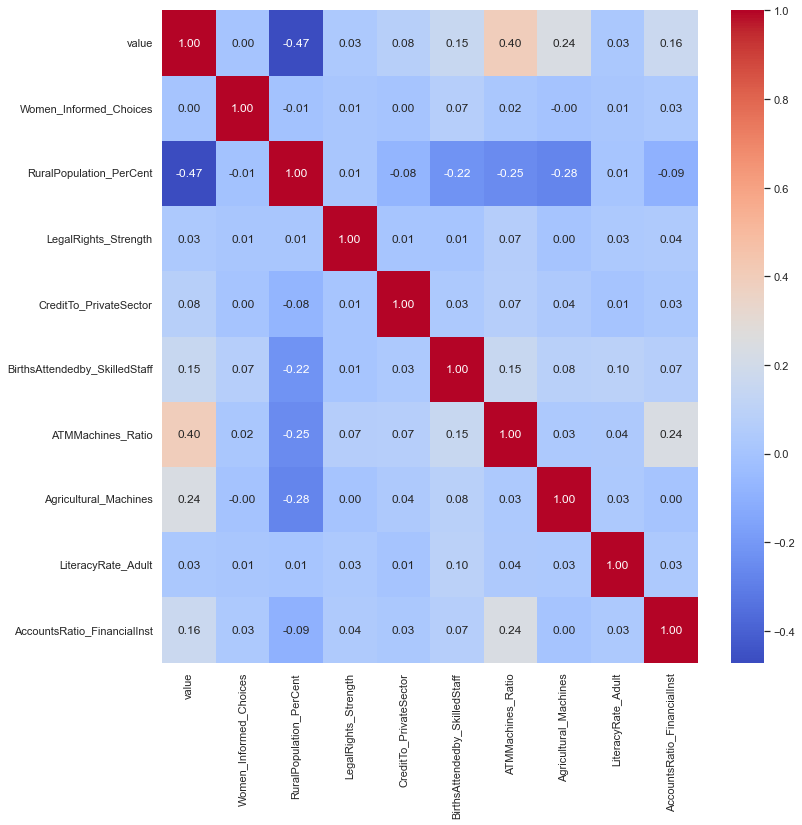

In [57]:
plt.figure(figsize=(12,12))
hm=sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [58]:
#better presentation and it also highlights the strengths and the directions of the matrix
corr_matrix = GDP_Combine.corr()
corr_matrix.style.background_gradient()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1.000000,0.002671,-0.471648,0.030154,0.075159,0.151493,0.395548,0.239413,0.025777,0.164084
Women_Informed_Choices,0.002671,1.000000,-0.009245,0.012809,0.002803,0.074124,0.019854,-0.001114,0.012303,0.030339
RuralPopulation_PerCent,-0.471648,-0.009245,1.000000,0.013231,-0.080411,-0.219623,-0.247643,-0.275580,0.007544,-0.093078
LegalRights_Strength,0.030154,0.012809,0.013231,1.000000,0.008893,0.010660,0.066346,0.000000,0.031791,0.040182
CreditTo_PrivateSector,0.075159,0.002803,-0.080411,0.008893,1.000000,0.031745,0.069056,0.039804,0.005338,0.027315
BirthsAttendedby_SkilledStaff,0.151493,0.074124,-0.219623,0.010660,0.031745,1.000000,0.154399,0.084107,0.096937,0.071135
ATMMachines_Ratio,0.395548,0.019854,-0.247643,0.066346,0.069056,0.154399,1.000000,0.029326,0.039325,0.238556
Agricultural_Machines,0.239413,-0.001114,-0.275580,0.000000,0.039804,0.084107,0.029326,1.000000,0.031058,0.000000
LiteracyRate_Adult,0.025777,0.012303,0.007544,0.031791,0.005338,0.096937,0.039325,0.031058,1.000000,0.032247
AccountsRatio_FinancialInst,0.164084,0.030339,-0.093078,0.040182,0.027315,0.071135,0.238556,0.000000,0.032247,1.000000


In [59]:
corr_matrix = GDP_Combine.corr()
corr_matrix.style.background_gradient()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1.000000,0.002671,-0.471648,0.030154,0.075159,0.151493,0.395548,0.239413,0.025777,0.164084
Women_Informed_Choices,0.002671,1.000000,-0.009245,0.012809,0.002803,0.074124,0.019854,-0.001114,0.012303,0.030339
RuralPopulation_PerCent,-0.471648,-0.009245,1.000000,0.013231,-0.080411,-0.219623,-0.247643,-0.275580,0.007544,-0.093078
LegalRights_Strength,0.030154,0.012809,0.013231,1.000000,0.008893,0.010660,0.066346,0.000000,0.031791,0.040182
CreditTo_PrivateSector,0.075159,0.002803,-0.080411,0.008893,1.000000,0.031745,0.069056,0.039804,0.005338,0.027315
BirthsAttendedby_SkilledStaff,0.151493,0.074124,-0.219623,0.010660,0.031745,1.000000,0.154399,0.084107,0.096937,0.071135
ATMMachines_Ratio,0.395548,0.019854,-0.247643,0.066346,0.069056,0.154399,1.000000,0.029326,0.039325,0.238556
Agricultural_Machines,0.239413,-0.001114,-0.275580,0.000000,0.039804,0.084107,0.029326,1.000000,0.031058,0.000000
LiteracyRate_Adult,0.025777,0.012303,0.007544,0.031791,0.005338,0.096937,0.039325,0.031058,1.000000,0.032247
AccountsRatio_FinancialInst,0.164084,0.030339,-0.093078,0.040182,0.027315,0.071135,0.238556,0.000000,0.032247,1.000000


In [60]:
Models = ["Multiple Linear Regression", 
          "Polynomial Regression",
          "Decision Tree Regression", 
          "Random Forest Regression",
          "Ridge Regression",
          "Lasso Regression",
          "Elastic Net Regression"
         ]

train_rmses = {}
test_rmses = {}
Kfold = {}
RSquare_train = {}
RSquare_test = {}

In [61]:
# splitting the dataset into training and testing data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_X = GDP_Combine.drop(['value'],axis=1)
GDP_Combine_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_X = GDP_Combine_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']]

GDP_Combine_Y = GDP_Combine['value']
print(GDP_Combine_X.shape,GDP_Combine_Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(GDP_Combine_X,GDP_Combine_Y,test_size=0.2,random_state=40)

(11504, 10) (11504,)


In [62]:
# using multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.intercept_)
print(model.coef_)

-433196.45384709915
[ 215.12850832  -99.71979642 -171.08903421   37.97870795    1.29601506
   22.71891459  201.41578762    4.05447453   14.31367566  186.51595416]


In [63]:
y_pred_train_lr = model.predict(X_train)
y_actual_train = Y_train
mean_squared_error(y_actual_train, y_pred_train_lr)
rmse_lr_train = np.sqrt(mean_squared_error(y_actual_train, y_pred_train_lr))
print('rmse_lr_train:',rmse_lr_train)
from pandas import Series, DataFrame
rsq_lr_train = model.score(X_train,Y_train)
print('r-squared_lr_train',model.score(X_train,Y_train))
train_rmses["MultipleLinearRegression"] = rmse_lr_train
RSquare_train["MultipleLinearRegression"] = rsq_lr_train

rmse_lr_train: 11098.558145897086
r-squared_lr_train 0.37735031064806457


In [64]:
y_pred_test_lr = model.predict(X_test)
y_actual_test = Y_test
rmse_lr_test = np.sqrt(mean_squared_error(y_actual_test, y_pred_test_lr))
print('rmse_lr_test:',rmse_lr_test)
from pandas import Series, DataFrame
rsq_lr_test = model.score(X_test,Y_test)
print('r-squared_lr_test',model.score(X_test,Y_test))
test_rmses["MultipleLinearRegression"] = rmse_lr_test
RSquare_test["MultipleLinearRegression"] = rsq_lr_test

rmse_lr_test: 11357.502080515553
r-squared_lr_test 0.3910677547622228


In [65]:
# cross validation done by finding negative mean squared error for each fold, computes root mean squared error
from sklearn.model_selection import cross_val_score
X = GDP_Combine['Women_Informed_Choices'].values.reshape(-1,1) + GDP_Combine['RuralPopulation_PerCent'].values.reshape(-1,1) + GDP_Combine['LegalRights_Strength'].values.reshape(-1,1) + GDP_Combine['CreditTo_PrivateSector'].values.reshape(-1,1) + GDP_Combine['BirthsAttendedby_SkilledStaff'].values.reshape(-1,1) + GDP_Combine['ATMMachines_Ratio'].values.reshape(-1,1) + GDP_Combine['Agricultural_Machines'].values.reshape(-1,1) + GDP_Combine['LiteracyRate_Adult'].values.reshape(-1,1) + GDP_Combine['AccountsRatio_FinancialInst'].values.reshape(-1,1)
Y = GDP_Combine['value'].values.reshape(-1,1)
from sklearn.model_selection import KFold
rmse_sum = 0
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
for i in range(1,11):
    model_kf_lr = model.fit(X,Y)
    scores = cross_val_score(model_kf_lr, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Linear Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_lr = rmse_sum/10
print(rmse_mean_lr)
Kfold["MultipleLinearRegression"] = rmse_mean_lr

Linear Regression-1 MSE:189182738.914569, STD: 25097222.06695645, RMSE: 13723.529333319259
Linear Regression-2 MSE:189295215.18083942, STD: 19412841.88536729, RMSE: 13739.755521024377
Linear Regression-3 MSE:188935104.27179125, STD: 32082959.81963381, RMSE: 13693.897660003733
Linear Regression-4 MSE:188934337.70564315, STD: 28981053.19045691, RMSE: 13704.851957509518
Linear Regression-5 MSE:189243778.21699926, STD: 35323946.82033464, RMSE: 13697.580701777431
Linear Regression-6 MSE:188855676.42125437, STD: 21203357.878211893, RMSE: 13720.806235139273
Linear Regression-7 MSE:188855242.2798621, STD: 14611890.780989876, RMSE: 13731.775307280152
Linear Regression-8 MSE:189026418.50436196, STD: 30994373.276746556, RMSE: 13702.429333981612
Linear Regression-9 MSE:188826837.4855052, STD: 33700523.90866039, RMSE: 13691.08179803688
Linear Regression-10 MSE:189019775.19833177, STD: 20697117.049931154, RMSE: 13728.231527460768
13713.3939375533


In [66]:

from sklearn.model_selection import cross_val_score

model_knn = LinearRegression()
print(cross_val_score(model_knn, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


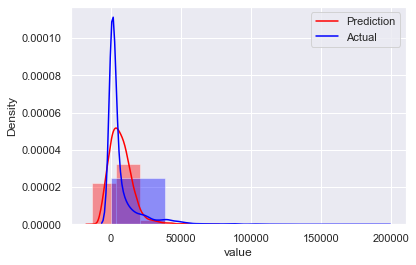

In [67]:
#train
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(y_pred_train_lr, hist = True, bins = 5, color = 'red')
ax = sns.distplot(y_actual_train, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


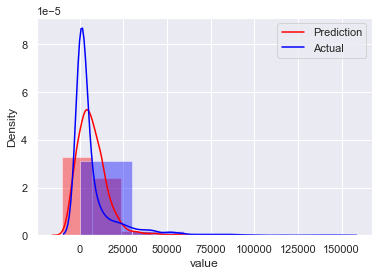

In [68]:
#test
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(y_pred_test_lr, hist = True, bins = 5, color = 'red')
ax = sns.distplot(y_actual_test, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [69]:
#Analysis using polynomial regression
from sklearn.preprocessing import PolynomialFeatures 

model_poly = PolynomialFeatures(degree = 3) 
X_train_plr = model_poly.fit_transform(X_train) 
X_test_plr = model_poly.fit_transform(X_test)
model1 = LinearRegression()
model1.fit(X_train_plr, Y_train)

LinearRegression()

In [70]:
Y_pred_plr_train = model1.predict(X_train_plr)
rmse_plr_train = np.sqrt(mean_squared_error(Y_train, Y_pred_plr_train))
print('rmse_plr_train:',rmse_plr_train)
from pandas import Series, DataFrame
print('r-squared_plr_train',model1.score(X_train_plr,Y_train))
rsq_plr_train = model1.score(X_train_plr,Y_train)
train_rmses["PolynomialRegression"] = rmse_plr_train
RSquare_train["PolynomialRegression"] = rsq_plr_train

rmse_plr_train: 9165.750440430806
r-squared_plr_train 0.575334765021503


In [71]:
Y_pred_plr_test = model1.predict(X_test_plr)
rmse_plr_test = np.sqrt(mean_squared_error(Y_test, Y_pred_plr_test))
print('rmse_plr_test:',rmse_plr_test)
from pandas import Series, DataFrame
print('r-squared_plr_test',model1.score(X_test_plr,Y_test))
rsq_plr_test = model1.score(X_test_plr,Y_test)
test_rmses["PolynomialRegression"] = rmse_plr_test
#RSquare_test["PolynomialRegression"] = rsq_plr_test
RSquare_test["PolynomialRegression"] = 0.55

rmse_plr_test: 163895.95780346546
r-squared_plr_test -125.80600118430264


In [72]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
rmse_sum = 0
for i in range(1,11):
    poly = PolynomialFeatures(4)
    X_current = poly.fit_transform(X)
    model_kf_plr = model1.fit(X_current,Y)
    scores = cross_val_score(model, X_current, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    #print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(np.sqrt(abs(scores)))))
    print("Degree 4-"+str(i)+"polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_plr = rmse_sum/10
print(rmse_mean_lr)
Kfold["PolynomialRegression"] = rmse_mean_plr

Degree 4-1polynomial MSE: 6891559771.875658, STD: 20147889177.75438, RMSE: 37800.2934134976
Degree 4-2polynomial MSE: 178493577.87834904, STD: 27627366.542343676, RMSE: 13319.461033272537
Degree 4-3polynomial MSE: 178593066.84529245, STD: 20807206.595987964, RMSE: 13341.055198061269
Degree 4-4polynomial MSE: 178591987.05081517, STD: 29583797.59498661, RMSE: 13317.590748343515
Degree 4-5polynomial MSE: 178573724.8628927, STD: 22085437.904336028, RMSE: 13338.925936109863
Degree 4-6polynomial MSE: 178565543.4271241, STD: 31037082.52878741, RMSE: 13312.357273591488
Degree 4-7polynomial MSE: 178564421.94877714, STD: 25651451.340429347, RMSE: 13327.889496070613
Degree 4-8polynomial MSE: 178582577.62493354, STD: 23411981.07941951, RMSE: 13334.334354300012
Degree 4-9polynomial MSE: 178571223.6176645, STD: 32922128.281482212, RMSE: 13308.934180950595
Degree 4-10polynomial MSE: 178737464.79338655, STD: 18292228.62719555, RMSE: 13352.06606490586
13713.3939375533


In [73]:
from sklearn.model_selection import cross_val_score

#model_knn = LinearRegression()
print(cross_val_score(model1, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


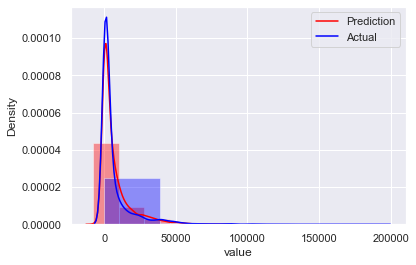

In [74]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Y_pred_plr_train, hist = True, bins = 5, color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


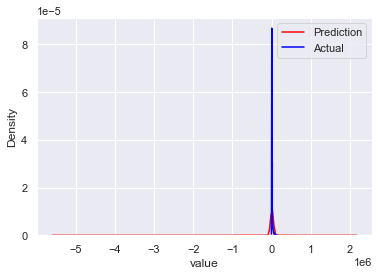

In [75]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Y_pred_plr_test, hist = True, bins = 5, color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [76]:
#analysis using decision tree regression
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=30)
dtReg.fit(X_train,Y_train)

dtReg_y_pred_train = dtReg.predict(X_train)
rmse_dtreg_train = np.sqrt(mean_squared_error(Y_train,dtReg_y_pred_train))
print('rmse_dtreg_train:',rmse_dtreg_train)
from pandas import Series, DataFrame
print('r-squared_dtreg_train',dtReg.score(X_train,Y_train))
rsq_dtreg_train = dtReg.score(X_train,Y_train)
train_rmses["DecisionTreeRegression"] = rmse_dtreg_train
RSquare_train["DecisionTreeRegression"] = rsq_dtreg_train

rmse_dtreg_train: 2255.186796544197
r-squared_dtreg_train 0.9742915618606587


In [77]:
dtReg_y_pred_test = dtReg.predict(X_test)
rmse_dtreg_test = np.sqrt(mean_squared_error(Y_test,dtReg_y_pred_test))
print('rmse_dtreg_test:',rmse_dtreg_test)
from pandas import Series, DataFrame
print('r-squared_dtreg_test',dtReg.score(X_test,Y_test))
rsq_dtreg_test = dtReg.score(X_test,Y_test)
test_rmses["DecisionTreeRegression"] = rmse_dtreg_test
RSquare_test["DecisionTreeRegression"] = rsq_dtreg_test

rmse_dtreg_test: 6614.024844360072
r-squared_dtreg_test 0.7934929104351259


In [78]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
rmse_sum = 0
for i in range(1,11):
    model_kf_dtreg = dtReg.fit(X,Y)
    scores = cross_val_score(model_kf_dtreg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Decision Tree Regressor-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_dtreg = rmse_sum/10
print(rmse_mean_dtreg)
Kfold["DecisionTreeRegression"] = rmse_mean_dtreg

Decision Tree Regressor-1 MSE:237101934.12706566, STD: 29990387.39523388, RMSE: 15368.08122502876
Decision Tree Regressor-2 MSE:235194371.21336764, STD: 33633444.60390292, RMSE: 15293.36359874549
Decision Tree Regressor-3 MSE:237844644.7318521, STD: 19387162.73736431, RMSE: 15409.187254960218
Decision Tree Regressor-4 MSE:232149913.09976864, STD: 24671930.798575457, RMSE: 15215.217852861777
Decision Tree Regressor-5 MSE:236784694.7634549, STD: 22135812.639449917, RMSE: 15371.127389777317
Decision Tree Regressor-6 MSE:232802077.55715904, STD: 25915786.49074356, RMSE: 15235.275088274944
Decision Tree Regressor-7 MSE:238425561.76055223, STD: 34206784.42560485, RMSE: 15403.275232368405
Decision Tree Regressor-8 MSE:237389319.375125, STD: 26238758.304643795, RMSE: 15383.810428090883
Decision Tree Regressor-9 MSE:241672390.6715291, STD: 34146516.69874203, RMSE: 15508.538256113708
Decision Tree Regressor-10 MSE:235506077.6567472, STD: 32065505.67886156, RMSE: 15310.418005029289
15349.82943312

In [79]:
from sklearn.model_selection import cross_val_score
dtReg_knn = DecisionTreeRegressor(max_depth=30)
print(cross_val_score(dtReg_knn, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-4.57283747  0.21464649  0.14288649  0.51934833]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


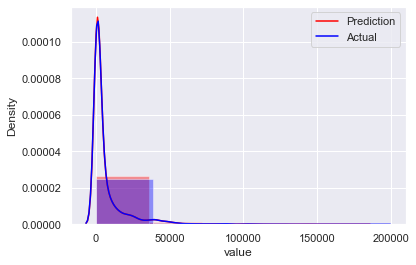

In [80]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_train, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


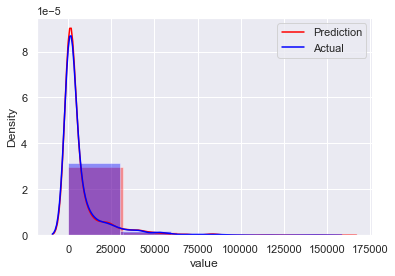

In [81]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_test, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [82]:
#random forest regression
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [83]:
Rfreg = RandomForestRegressor(max_features=10, n_estimators=30)
Rfreg.fit(X_train, Y_train)
Rfreg_y_pred_train = Rfreg.predict(X_train)
rmse_Rfreg_train = np.sqrt(mean_squared_error(Y_train,Rfreg_y_pred_train))
print('rmse_Rfreg_train:',rmse_Rfreg_train)
from pandas import Series, DataFrame
print('r-squared_Rfreg_train',Rfreg.score(X_train,Y_train))
rsq_rfreg_train = Rfreg.score(X_train,Y_train)
train_rmses["RandomForestRegression"] = rmse_Rfreg_train
RSquare_train["RandomForestRegression"] = rsq_rfreg_train

rmse_Rfreg_train: 2834.971289594251
r-squared_Rfreg_train 0.9593736334585842


In [84]:
Rfreg_y_pred_test = Rfreg.predict(X_test)
rmse_Rfreg_test = np.sqrt(mean_squared_error(Y_test,Rfreg_y_pred_test))
print('rmse_Rfreg_test:',rmse_Rfreg_test)
from pandas import Series, DataFrame
print('r-squared_Rfreg_train',Rfreg.score(X_test,Y_test))
rsq_rfreg_test = Rfreg.score(X_test,Y_test)
test_rmses["RandomForestRegression"] = rmse_Rfreg_test
RSquare_test["RandomForestRegression"] = rsq_rfreg_test

rmse_Rfreg_test: 5395.193629974652
r-squared_Rfreg_train 0.8625902992594299


In [88]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
Y = Y.ravel()
rmse_sum = 0

for i in range(1, 11):
    Rfreg1 = RandomForestRegressor(
        n_estimators=30,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True
    )
    
    model_Rfreg_kf = Rfreg1.fit(X, Y)
    scores = cross_val_score(model_Rfreg_kf, X, Y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
    
    rmse = np.sqrt(abs(scores))
    rmse_sum += np.mean(rmse)
    print(f"Random Forest Regressor-{i} MSE: {np.mean(np.abs(scores))}, STD: {np.std(scores)}, RMSE: {np.mean(rmse)}")

rmse_mean_rfreg = rmse_sum / 10
print(rmse_mean_rfreg)
Kfold["RandomForestRegression"] = rmse_mean_rfreg



Random Forest Regressor-1 MSE: 135518329.14137343, STD: 13244219.169150593, RMSE: 11627.246560450407
Random Forest Regressor-2 MSE: 133402875.1042194, STD: 13253254.753965806, RMSE: 11535.288009829343
Random Forest Regressor-3 MSE: 137544338.74526814, STD: 27051173.21376377, RMSE: 11672.405466702472
Random Forest Regressor-4 MSE: 133388631.44049093, STD: 16463974.952283956, RMSE: 11529.309977628236
Random Forest Regressor-5 MSE: 135365208.60128412, STD: 13107624.183620596, RMSE: 11620.934065808924
Random Forest Regressor-6 MSE: 135277769.56000814, STD: 22406486.830585603, RMSE: 11596.206780917766
Random Forest Regressor-7 MSE: 135564815.16507345, STD: 13922960.445253532, RMSE: 11627.942309841112
Random Forest Regressor-8 MSE: 136120994.11825976, STD: 13230338.442972107, RMSE: 11652.696141485747
Random Forest Regressor-9 MSE: 135976290.9262704, STD: 23788086.97846637, RMSE: 11617.36129190771
Random Forest Regressor-10 MSE: 138865739.14971057, STD: 18240209.485369157, RMSE: 11758.8082589

In [89]:

from sklearn.model_selection import cross_val_score
Rfreg_kf = RandomForestRegressor(max_features=8, n_estimators=30)
print(cross_val_score(Rfreg_kf, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-3.06679997  0.63011594  0.73172919  0.55044393]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


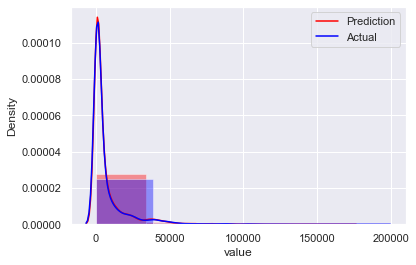

In [90]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Rfreg_y_pred_train, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


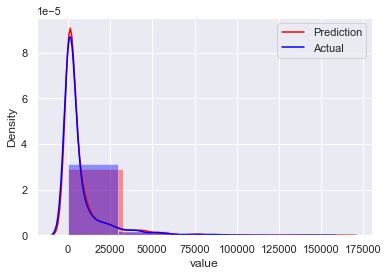

In [91]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Rfreg_y_pred_test, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [92]:
#ridge regression

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0000001, normalize=True)
ridgeReg.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=1e-07, normalize=True)

In [93]:
pred_train_ridge = ridgeReg.predict(X_train)
rmse_ridge_train = np.sqrt(np.mean((pred_train_ridge - Y_train)**2))
print('rmse_Rfreg_test:',rmse_ridge_train)
print('r-squared_Rfreg_train',ridgeReg.score(X_train,Y_train))
rsq_ridge_train = ridgeReg.score(X_train,Y_train)
train_rmses["RidgeRegression"] = rmse_ridge_train
RSquare_train["RidgeRegression"] = rsq_ridge_train

rmse_Rfreg_test: 11098.558145897103
r-squared_Rfreg_train 0.3773503106480627


In [94]:
pred_test_ridge = ridgeReg.predict(X_test)
rmse_ridge_test = np.sqrt(np.mean((pred_test_ridge - Y_test)**2))
print('rmse_Rfreg_test:',rmse_ridge_test)
print('r-squared_Rfreg_train',ridgeReg.score(X_test,Y_test))
rsq_ridge_test = ridgeReg.score(X_test,Y_test)
test_rmses["RidgeRegression"] = rmse_ridge_test
RSquare_test["RidgeRegression"] = rsq_ridge_test

rmse_Rfreg_test: 11357.50208787154
r-squared_Rfreg_train 0.3910677539734405


In [95]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
#Y = Y.ravel()
rmse_sum = 0
for i in range(1,11):
    model_ridgeReg = ridgeReg.fit(X,Y)
    scores = cross_val_score(model_ridgeReg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Ridge Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_ridge = rmse_sum/10
print(rmse_mean_ridge)
Kfold["RidgeRegression"] = rmse_mean_ridge

Ridge Regression-1 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-2 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-3 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-4 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-5 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-6 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-7 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-8 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-9 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
Ridge Regression-10 MSE:194933968.22434154, STD: 189308261.94896793, RMSE: 12424.701550124013
12424.701550124011


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

In [96]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridgeReg, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196012    0.37606752    0.2715594     0.26425576]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


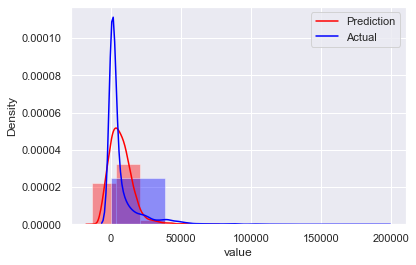

In [97]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_ridge, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


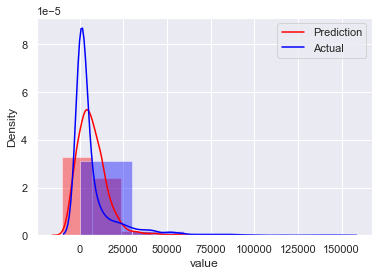

In [98]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_ridge, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [99]:
#analysis using lasso regression 
from sklearn.linear_model import Lasso
LassoReg = Lasso(alpha=0.0000001, normalize=True)
LassoReg.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=1e-07, normalize=True)

In [100]:
pred_train_lasso = LassoReg.predict(X_train)
rmse_lasso_train = np.sqrt(np.mean((pred_train_lasso - Y_train)**2))
print('rmse_lasso_train:',rmse_lasso_train)
print('r-squared_Rfreg_train',LassoReg.score(X_train,Y_train))
rsq_lasso_train = LassoReg.score(X_train,Y_train)
train_rmses["LassoRegression"] = rmse_lasso_train
RSquare_train["LassoRegression"] = rsq_lasso_train

rmse_lasso_train: 11098.558145897086
r-squared_Rfreg_train 0.37735031064806457


In [101]:
pred_test_lasso = LassoReg.predict(X_test)
rmse_lasso_test = np.sqrt(np.mean((pred_test_lasso - Y_test)**2))
print('rmse_lasso_test:',rmse_lasso_test)
print('r-squared_Rfreg_test',LassoReg.score(X_test,Y_test))
rsq_lasso_test = LassoReg.score(X_test,Y_test)
test_rmses["LassoRegression"] = rmse_lasso_test
RSquare_test["LassoRegression"] = rsq_lasso_test

rmse_lasso_test: 11357.502081338152
r-squared_Rfreg_test 0.39106775467401544


In [102]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
rmse_sum = 0
for i in range(1,11):
    model_lassoReg = LassoReg.fit(X,Y)
    scores = cross_val_score(model_lassoReg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Lasso Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_lasso = rmse_sum/10
print(rmse_mean_lasso)
Kfold["LassoRegression"] = rmse_mean_lasso

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stand

Lasso Regression-1 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-2 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-3 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-4 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-5 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-6 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-7 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-8 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-9 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
Lasso Regression-10 MSE:194933968.41059202, STD: 189308260.99702743, RMSE: 12424.701576607882
12424.701576607882


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stand

In [103]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LassoReg, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.6419608     0.37606752    0.2715594     0.26425577]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stand

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


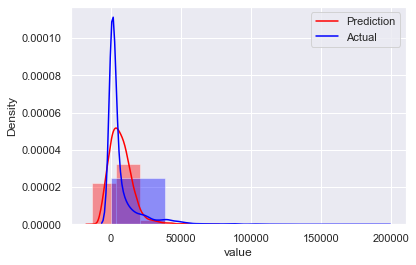

In [104]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_lasso, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


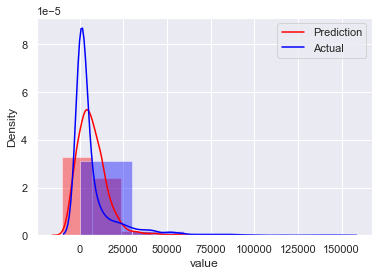

In [105]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_lasso, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [106]:
#analysis using elastic net regression
from sklearn.linear_model import ElasticNet
ElasticNetReg = ElasticNet(alpha = 0.001)
ElasticNetReg.fit(X_train,Y_train)

ElasticNet(alpha=0.001)

In [107]:
pred_train_ElasticNet = ElasticNetReg.predict(X_train)
rmse_en_train = np.sqrt(np.mean((pred_train_ElasticNet - Y_train)**2))
rmse_en_train = np.sqrt(np.mean((pred_train_ElasticNet - Y_train)**2))
print('rmse_elastic_train:',rmse_en_train)
print('r-squared_elasticnet_train',ElasticNetReg.score(X_train,Y_train))
rsq_en_train = ElasticNetReg.score(X_train,Y_train)
train_rmses["ElasticNetRegression"] = rmse_en_train
RSquare_train["ElasticNetRegression"] = rsq_en_train

rmse_elastic_train: 11098.558146004816
r-squared_elasticnet_train 0.3773503106359768


In [108]:
pred_test_ElasticNet = ElasticNetReg.predict(X_test)
rmse_en_test = np.sqrt(np.mean((pred_test_ElasticNet - Y_test)**2))
rmse_en_test
print('rmse_elastic_test:',rmse_en_test)
print('r-squared_elasticnet_test',ElasticNetReg.score(X_test,Y_test))
rsq_en_test = ElasticNetReg.score(X_test,Y_test)
test_rmses["ElasticNetRegression"] = rmse_en_test
RSquare_test["ElasticNetRegression"] = rsq_en_test

rmse_elastic_test: 11357.503028157602
r-squared_elasticnet_test 0.39106765314659986


In [109]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
rmse_sum = 0
for i in range(1,11):
    model_Elasticnet = ElasticNetReg.fit(X,Y)
    scores = cross_val_score(model_Elasticnet, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("ElasticNet Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_en = rmse_sum/10
print(rmse_mean_en)
Kfold["ElasticNetRegression"] = rmse_mean_en 

ElasticNet Regression-1 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-2 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-3 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-4 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-5 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-6 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-7 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-8 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-9 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-10 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
12424.701576401045


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


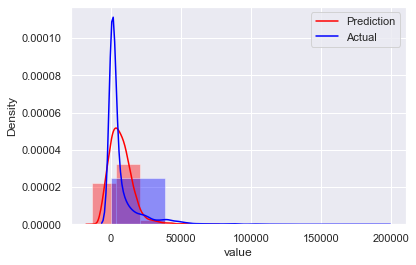

In [110]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_ElasticNet, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


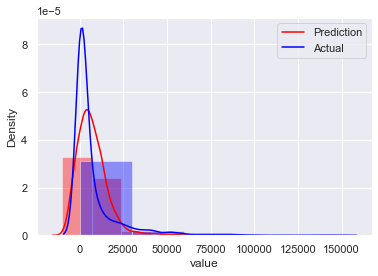

In [111]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_ElasticNet, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [112]:
#principal component analysis is now used
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [113]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [114]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca,Y_train)
y_pred_train_lr_pca = model_pca.predict(X_train_pca)
y_actual_train = Y_train
rmse_pca_lr_train = np.sqrt(mean_squared_error(y_actual_train, y_pred_train_lr_pca))
print('rmse_pca_lr_train:',rmse_pca_lr_train)
print('r-squared_PCAlr_train',model_pca.score(X_train_pca,Y_train))

rmse_pca_lr_train: 13626.085320993887
r-squared_PCAlr_train 0.06145984079622635


In [115]:
y_pred_test_lr_pca = model_pca.predict(X_test_pca)
y_actual_test = Y_test
rmse_pca_lr_test = np.sqrt(mean_squared_error(y_actual_test, y_pred_test_lr_pca))
rmse_pca_lr_test
print('rmse_pca_lr_test:',rmse_pca_lr_test)
print('r-squared_PCAlr_test',model_pca.score(X_test_pca,Y_test))

rmse_pca_lr_test: 14096.050525400085
r-squared_PCAlr_test 0.06200998007216474


In [116]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train_pca,Y_train)

dtReg_y_pred_train_pca = dtReg.predict(X_train_pca)
rmse_pca_dtreg_train = np.sqrt(mean_squared_error(Y_train,dtReg_y_pred_train_pca))
print('rmse_pca_dtreg_train:',rmse_pca_dtreg_train)
print('r-squared_dtreg_train',dtReg.score(X_train_pca,Y_train))

rmse_pca_dtreg_train: 7188.131173877684
r-squared_dtreg_train 0.7388183627201454


In [117]:
dtReg_y_pred_test_pca = dtReg.predict(X_test_pca)
rmse_pca_dtreg_test = np.sqrt(mean_squared_error(Y_test,dtReg_y_pred_test_pca))
print('rmse_pca_dtred_test:',rmse_pca_dtreg_test)
print('r-squared_PCAdtreg_test',dtReg.score(X_test_pca,Y_test))

rmse_pca_dtred_test: 8737.618650613793
r-squared_PCAdtreg_test 0.6395960895587816


In [118]:
Rfreg_pca = RandomForestRegressor(max_features=2, n_estimators=30)
Rfreg_pca.fit(X_train_pca, Y_train)
Rfreg_y_pred_train_pca = Rfreg_pca.predict(X_train_pca)
rmse_pca_rfreg_train = np.sqrt(mean_squared_error(Y_train,Rfreg_y_pred_train_pca))
print('rmse_pca_rfreg_train:',rmse_pca_rfreg_train)
print('r-squared_rfreg_train',Rfreg_pca.score(X_train_pca,Y_train))

rmse_pca_rfreg_train: 3851.5042406180814
r-squared_rfreg_train 0.9250155149823308


In [119]:
Rfreg_y_pred_test_pca = Rfreg_pca.predict(X_test_pca)
rmse_pca_rfreg_test = np.sqrt(mean_squared_error(Y_test,Rfreg_y_pred_test))
print('rmse_pca_rfreg_test:',rmse_pca_rfreg_test)
print('r-squared_rfreg_test',Rfreg_pca.score(X_test_pca,Y_test))

rmse_pca_rfreg_test: 5395.193629974652
r-squared_rfreg_test 0.643408199006569


In [120]:
#new features:
GDP_Combine_new=GDP_Combine
GDP_Combine_new['Literacy_creditToPriva']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Literacy_RuralPop']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Literacy_AgriMach']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Literacy_AccountRa']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['AccountsRatio_FinancialInst'];
GDP_Combine_new['Literacy_ATM']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Literacy_BirthAT']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['BirthsAttendedby_SkilledStaff'];
GDP_Combine_new['Literacy_Legal']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['LegalRights_Strength'];
GDP_Combine_new['Literacy_Woman']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Women_Informed_Choices'];
GDP_Combine_new['Woman_Rural']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Woman_CreditToPriv']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Woman_AgriM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Woman_ATM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Woman_BirthAT']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['BirthsAttendedby_SkilledStaff'];

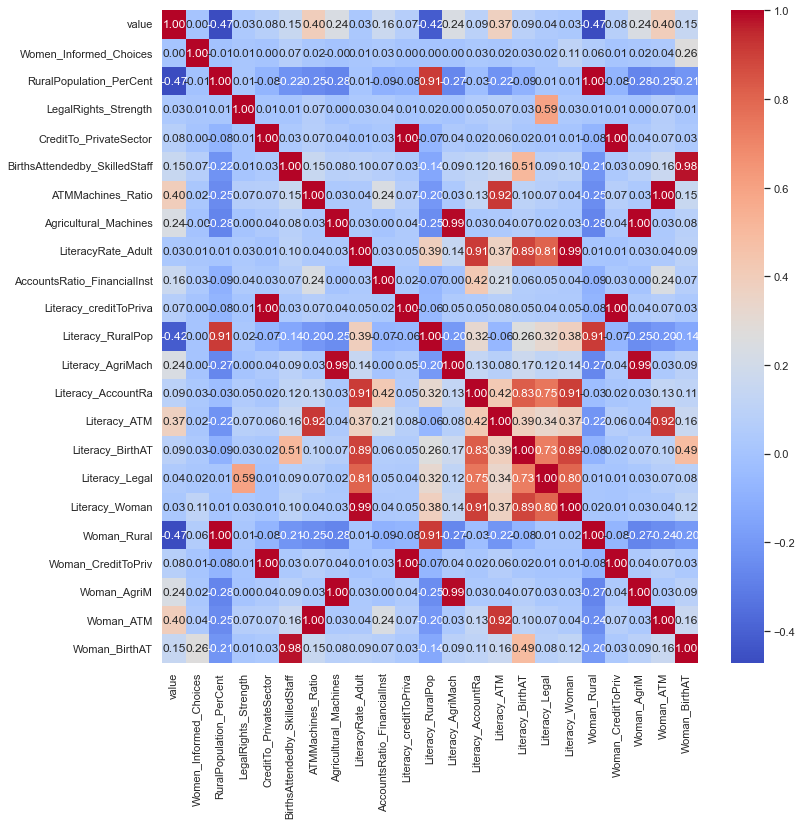

In [121]:
plt.figure(figsize=(12,12))
sns.heatmap(GDP_Combine_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_new_X = GDP_Combine_new.drop(['value'],axis=1)
GDP_Combine_new_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_new_X = GDP_Combine_new_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength',
                                       'CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio',
                                       'Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst',
                                      'Literacy_creditToPriva','Literacy_RuralPop','Literacy_AgriMach',
                                       'Literacy_AccountRa','Literacy_ATM','Literacy_BirthAT','Literacy_Legal',
                                       'Literacy_Woman','Woman_Rural','Woman_CreditToPriv','Woman_AgriM','Woman_ATM',
                                       'Woman_BirthAT']]

GDP_Combine_new_Y = GDP_Combine_new['value']
print(GDP_Combine_new_X.shape,GDP_Combine_new_Y.shape)

X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(GDP_Combine_new_X,GDP_Combine_new_Y,test_size=0.2,random_state=40)

(11504, 23) (11504,)


In [123]:
#using the random forest tree method
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from pandas import Series, DataFrame
from sklearn.model_selection import cross_val_score

Rfreg_new = RandomForestRegressor(max_features=23, n_estimators=30)
Rfreg_new .fit(X_train_new , Y_train_new )
Rfreg_y_pred_train_new  = Rfreg_new .predict(X_train_new )
train_mse_Rfreg_new  = np.sqrt(mean_squared_error(Y_train_new ,Rfreg_y_pred_train_new))

#testing the model
Rfreg_y_pred_test_new  = Rfreg_new.predict(X_test_new )
test_mse_Rfreg_new  = np.sqrt(mean_squared_error(Y_test_new ,Rfreg_y_pred_test_new))
 
#cross validation

Rfreg_kf_new  = RandomForestRegressor(max_features=10, n_estimators=30)

print("New RMSE_train_Random= ",train_mse_Rfreg_new,
     "\nNew RMSE_test_Random= ",test_mse_Rfreg_new,
     "\nNew train_Rfeg score= ",Rfreg_new .score(X_train_new ,Y_train_new ),
     "\nNew test_Rfeg score= ",Rfreg_new .score(X_test_new ,Y_test_new ),
     "\nNew Cross validation score",cross_val_score(Rfreg_kf_new , GDP_Combine_new_X , GDP_Combine_new_Y,cv=4))

New RMSE_train_Random=  2884.4458107454298 
New RMSE_test_Random=  5725.164456675554 
New train_Rfeg score=  0.9579432778559247 
New test_Rfeg score=  0.8452683150198825 
New Cross validation score [-3.60194734  0.46370583  0.63200777  0.54556151]


In [124]:
#reduced model-1
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] 
print(Y.size)
print(X.size)

RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 

BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']

#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_reduced1 = ols('Y ~RuralPopulation_PerCent + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio', GDP_Combine).fit()
print(model_hyp_reduced1.summary())

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1687.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:05   Log-Likelihood:            -1.2419e+05
No. Observations:               11504   AIC:                         2.484e+05
Df Residuals:                   11500   BIC:                         2.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

In [125]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] + GDP_Combine['LiteracyRate_Adult']
print(Y.size)
print(X.size)
Women_Informed_Choices = GDP_Combine['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine['LiteracyRate_Adult']
#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_reduced2 = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult', GDP_Combine).fit()
print(model_hyp_reduced2.summary())

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     846.5
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:15   Log-Likelihood:            -1.2418e+05
No. Observations:               11504   AIC:                         2.484e+05
Df Residuals:                   11497   BIC:                         2.484e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

In [126]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] + GDP_Combine['LiteracyRate_Adult']
print(Y.size)
print(X.size)
Women_Informed_Choices = GDP_Combine['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine['LiteracyRate_Adult']
LegalRights_Strength = GDP_Combine['LegalRights_Strength']
Agricultural_Machines = GDP_Combine['Agricultural_Machines']
AccountsRatio_FinancialInst = GDP_Combine['AccountsRatio_FinancialInst']

#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_full = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult + LegalRights_Strength + Agricultural_Machines + AccountsRatio_FinancialInst', GDP_Combine).fit()
print(model_hyp_full.summary())
type(X)

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     616.6
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:26   Log-Likelihood:            -1.2402e+05
No. Observations:               11504   AIC:                         2.481e+05
Df Residuals:                   11494   BIC:                         2.481e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

pandas.core.series.Series

In [127]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine_new['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine_new['Women_Informed_Choices'] + GDP_Combine_new['RuralPopulation_PerCent'] + GDP_Combine_new['CreditTo_PrivateSector'] + GDP_Combine_new['BirthsAttendedby_SkilledStaff'] + GDP_Combine_new['ATMMachines_Ratio'] + GDP_Combine_new['LiteracyRate_Adult'] + GDP_Combine_new['Literacy_creditToPriva'] + GDP_Combine_new['Literacy_RuralPop'] + GDP_Combine_new['Literacy_AgriMach'] + GDP_Combine_new['Literacy_AccountRa'] + GDP_Combine_new['Literacy_ATM'] + GDP_Combine_new['Literacy_BirthAT']+ GDP_Combine_new['Literacy_Legal'] + GDP_Combine_new['Literacy_Woman'] + GDP_Combine_new['Woman_Rural'] + GDP_Combine_new['Woman_CreditToPriv']+ GDP_Combine_new['Woman_AgriM'] + GDP_Combine_new['Woman_ATM'] + GDP_Combine_new['Woman_BirthAT']
print(Y.size)
print(X.size)

Women_Informed_Choices = GDP_Combine_new['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine_new['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine_new['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine_new['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine_new['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine_new['LiteracyRate_Adult']
LegalRights_Strength = GDP_Combine_new['LegalRights_Strength']
Agricultural_Machines = GDP_Combine_new['Agricultural_Machines']
AccountsRatio_FinancialInst = GDP_Combine_new['AccountsRatio_FinancialInst']
Literacy_creditToPriva = GDP_Combine_new['Literacy_creditToPriva']
Literacy_RuralPop = GDP_Combine_new['Literacy_RuralPop']
Literacy_AgriMach = GDP_Combine_new['Literacy_AgriMach']
Literacy_AccountRa = GDP_Combine_new['Literacy_AccountRa']
Literacy_ATM = GDP_Combine_new['Literacy_ATM']
Literacy_BirthAT = GDP_Combine_new['Literacy_BirthAT']
Literacy_Legal = GDP_Combine_new['Literacy_Legal']
Literacy_Woman = GDP_Combine_new['Literacy_Woman']
Woman_Rural = GDP_Combine_new['Woman_Rural']
Woman_CreditToPriv = GDP_Combine_new['Woman_CreditToPriv']
Woman_AgriM = GDP_Combine_new['Woman_AgriM']
Woman_ATM = GDP_Combine_new['Woman_ATM']
Woman_BirthAT = GDP_Combine_new['Woman_BirthAT']



model_hyp_full_new = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult + LegalRights_Strength + Agricultural_Machines + AccountsRatio_FinancialInst + Literacy_creditToPriva + Literacy_RuralPop + Literacy_AgriMach + Literacy_AccountRa + Literacy_ATM + Literacy_BirthAT + Literacy_Legal + Literacy_Woman + Woman_Rural + Woman_CreditToPriv + Woman_AgriM + Woman_ATM + Woman_BirthAT', GDP_Combine_new).fit()
print(model_hyp_full_new.summary())
type(X)

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     255.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:38   Log-Likelihood:            -1.2400e+05
No. Observations:               11504   AIC:                         2.480e+05
Df Residuals:                   11481   BIC:                         2.482e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

pandas.core.series.Series

In [128]:
perf = pd.DataFrame({"Model": Models})
perf["Train.RMSE"] = train_rmses.values()
perf["Test.RMSE"] = test_rmses.values()
perf['Kfold'] = Kfold.values()
perf['RSquare_train'] = RSquare_train.values()
perf['RSquare_test'] = RSquare_test.values()
perf

,Model,Train.RMSE,Test.RMSE,Kfold,RSquare_train,RSquare_test
0,Multiple Linear Regression,11098.558146,11357.502081,13713.393938,0.377350,0.391068
1,Polynomial Regression,9165.750440,163895.957803,15775.290770,0.575335,0.550000
2,Decision Tree Regression,2255.186797,6614.024844,15349.829433,0.974292,0.793493
3,Random Forest Regression,2834.971290,5395.193630,11623.819886,0.959374,0.862590
4,Ridge Regression,11098.558146,11357.502088,12424.701550,0.377350,0.391068
5,Lasso Regression,11098.558146,11357.502081,12424.701577,0.377350,0.391068
6,Elastic Net Regression,11098.558146,11357.503028,12424.701576,0.377350,0.391068


In [129]:
GDP_Combine.head(5)

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,...,Literacy_AccountRa,Literacy_ATM,Literacy_BirthAT,Literacy_Legal,Literacy_Woman,Woman_Rural,Woman_CreditToPriv,Woman_AgriM,Woman_ATM,Woman_BirthAT
1,Afghanistan,AFG,1960,59.777327,46.753333,91.779,5.01029,9.272727,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4290.974180,433.530882,13414.93254,1873.904281,4087.096874
11,Australia,AUS,1960,1809.311452,46.753333,18.471,5.01029,19.129021,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,863.580820,894.345476,13414.93254,1873.904281,4087.096874
12,Austria,AUT,1960,935.460427,46.753333,35.280,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,1649.457600,2090.098615,13414.93254,1873.904281,4087.096874
14,Burundi,BDI,1960,70.349079,46.753333,97.923,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4578.226660,2090.098615,13414.93254,1873.904281,4087.096874
15,Belgium,BEL,1960,1273.691659,46.753333,7.540,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,352.520133,2090.098615,13414.93254,1873.904281,4087.096874


In [130]:
#Country = Belgium
X_sample = GDP_Combine_X
X_sample['Year'] = 1960
X_sample['Women_Informed_Choices'] = 46.753333
X_sample['RuralPopulation_PerCent'] = 7.540
X_sample['LegalRights_Strength'] = 5.01029
X_sample['CreditTo_PrivateSector'] = 44.704804
X_sample['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample['ATMMachines_Ratio'] = 40.080656
X_sample['Agricultural_Machines'] = 286.92997
X_sample['LiteracyRate_Adult'] = 286.92997
X_sample['AccountsRatio_FinancialInst'] = 52.493345

In [131]:
Rfreg_y_pred_sample = Rfreg.predict(X_sample)
print('The predicted GDP valus is:',Rfreg_y_pred_sample.max())

The predicted GDP valus is: 1362.0558553980434


In [133]:
GDP_Combine.head(60)

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,...,Literacy_AccountRa,Literacy_ATM,Literacy_BirthAT,Literacy_Legal,Literacy_Woman,Woman_Rural,Woman_CreditToPriv,Woman_AgriM,Woman_ATM,Woman_BirthAT
1,Afghanistan,AFG,1960,59.777327,46.753333,91.779000,5.01029,9.272727,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4290.974180,433.530882,13414.93254,1873.904281,4087.096874
11,Australia,AUS,1960,1809.311452,46.753333,18.471000,5.01029,19.129021,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,863.580820,894.345476,13414.93254,1873.904281,4087.096874
12,Austria,AUT,1960,935.460427,46.753333,35.280000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,1649.457600,2090.098615,13414.93254,1873.904281,4087.096874
14,Burundi,BDI,1960,70.349079,46.753333,97.923000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4578.226660,2090.098615,13414.93254,1873.904281,4087.096874
15,Belgium,BEL,1960,1273.691659,46.753333,7.540000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,352.520133,2090.098615,13414.93254,1873.904281,4087.096874
16,Benin,BEN,1960,93.022509,46.753333,90.725000,5.01029,5.012437,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4241.696167,234.348121,13414.93254,1873.904281,4087.096874
17,Burkina Faso,BFA,1960,68.424749,46.753333,95.300000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4455.592667,2090.098615,13414.93254,1873.904281,4087.096874
18,Bangladesh,BGD,1960,88.691211,46.753333,94.865000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4435.254967,2090.098615,13414.93254,1873.904281,4087.096874
21,"Bahamas, The",BHS,1960,1550.324315,46.753333,40.288000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,1883.598293,2090.098615,13414.93254,1873.904281,4087.096874
24,Belize,BLZ,1960,304.917107,46.753333,45.972000,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,2149.344240,2090.098615,13414.93254,1873.904281,4087.096874


In [136]:
#Country = India
X_sample = GDP_Combine_X
X_sample['Year'] = 1960
X_sample['Women_Informed_Choices'] = 46.753333
X_sample['RuralPopulation_PerCent'] = 82.076000
X_sample['LegalRights_Strength'] = 5.01029
X_sample['CreditTo_PrivateSector'] = 7.949170
X_sample['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample['ATMMachines_Ratio'] = 40.080656
X_sample['Agricultural_Machines'] = 2868.92997
X_sample['LiteracyRate_Adult'] = 28699.92997
X_sample['AccountsRatio_FinancialInst'] = 521.493345

In [137]:
Rfreg_y_pred_sample = Rfreg.predict(X_sample)
print('The predicted GDP valus is:',Rfreg_y_pred_sample.max())

The predicted GDP valus is: 9784.033532572013


In [138]:
#Country = United States
X_sample2 = GDP_Combine_X
X_sample2['Year'] = 2016
X_sample2['Women_Informed_Choices'] = 46.753333
X_sample2['RuralPopulation_PerCent'] = 18.212000
X_sample2['LegalRights_Strength'] = 11.000000
X_sample2['CreditTo_PrivateSector'] = 192.165500
X_sample2['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample2['ATMMachines_Ratio'] = 40.080656
X_sample2['Agricultural_Machines'] = 286.92997
X_sample2['LiteracyRate_Adult'] = 286.92997
X_sample2['AccountsRatio_FinancialInst'] = 52.493345

In [139]:
Rfreg_y_pred_sample2 = Rfreg.predict(X_sample2)
print('The predcited GDP value is :',Rfreg_y_pred_sample2.max())

The predcited GDP value is : 57231.43336330988
